In [1]:
#Code task 1#
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
vfl=pd.read_csv('vflabel.csv',index_col=0)

In [3]:
vfl.head(5).T

,0,1,2,3,4
Month,Dec,Jan,Oct,Jun,Jan
WeekOfMonth,5,3,5,2,5
DayOfWeek,Wednesday,Wednesday,Friday,Saturday,Monday
Make,Honda,Honda,Honda,Toyota,Honda
AccidentArea,Urban,Urban,Urban,Rural,Urban
DayOfWeekClaimed,Tuesday,Monday,Thursday,Friday,Tuesday
MonthClaimed,Jan,Jan,Nov,Jul,Feb
WeekOfMonthClaimed,1,4,2,1,2
Sex,Female,Male,Male,Male,Female
MaritalStatus,Single,Single,Married,Married,Single


In [4]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

In [5]:
!pip install category_encoders

In [6]:
cols=['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'Deductible', 'DriverRating',
       'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
       'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled',
       'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
       'AddressChange_Claim', 'NumberOfCars', 'Year', 'BasePolicy',
       'age_bins']

In [7]:
import category_encoders as ce
woe = ce.WOEEncoder(cols=cols)

In [8]:
#Peform the train test split 
X_trw, X_tew, y_trw, y_tew = train_test_split(vfl.drop(columns='FraudFound_P'), 
                                                    vfl.FraudFound_P, test_size=0.2, 
                                                    random_state=47,stratify=vfl.FraudFound_P)

In [9]:
lab_train = woe.fit_transform(X_trw, y_trw)
lab_test=woe.transform(X_tew)

In [10]:
lab_traindf=pd.concat([lab_train,y_trw],axis='columns')
lab_testdf=pd.concat([lab_test,y_tew],axis='columns')
lab_traindf.head(5).T

,1010,14605,5450,3474,3842
Month,-0.196448,0.189110,0.248719,0.189110,0.009191
WeekOfMonth,0.004337,-0.077121,0.004337,0.004337,-0.047068
DayOfWeek,0.184856,0.086822,0.054290,0.086822,-0.102922
Make,0.070328,-0.047033,0.891358,-0.110091,-0.046424
AccidentArea,-0.051058,-0.051058,-0.051058,-0.051058,0.366069
DayOfWeekClaimed,-0.030445,0.068844,0.144858,0.068844,0.068844
MonthClaimed,-0.305107,-0.021520,0.339382,0.182242,0.290890
WeekOfMonthClaimed,0.079716,-0.042402,-0.069481,-0.003992,0.079716
Sex,-0.367150,0.056069,0.056069,0.056069,0.056069
MaritalStatus,0.008056,0.008056,0.008056,-0.021599,-0.021599


In [11]:
from pycaret.classification import *
s = setup(lab_traindf, target = 'FraudFound_P',data_split_stratify=True,
          fix_imbalance = True,train_size=0.8,fold_shuffle=True,fold=5,
            feature_selection=True,feature_selection_threshold=0.6,
            ignore_low_variance =True,remove_multicollinearity = True,combine_rare_levels=True,session_id=1122)

,Description,Value
0,session_id,1122
1,Target,FraudFound_P
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(12336, 31)"
5,Missing Values,False
6,Numeric Features,24
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [12]:
setup_label = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.9402,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0100
gbc,Gradient Boosting Classifier,0.9401,0.7926,0.0153,0.4250,0.0293,0.0257,0.0706,0.7020
lightgbm,Light Gradient Boosting Machine,0.9387,0.8152,0.0339,0.3407,0.0614,0.0519,0.0916,0.1260
et,Extra Trees Classifier,0.9377,0.7952,0.0424,0.3479,0.0754,0.0628,0.1033,0.5020
rf,Random Forest Classifier,0.9375,0.7797,0.0254,0.2413,0.0455,0.0355,0.0608,0.6580
ada,Ada Boost Classifier,0.9145,0.7811,0.1458,0.2058,0.1685,0.1252,0.1282,0.2640
dt,Decision Tree Classifier,0.8706,0.5495,0.1847,0.1197,0.1451,0.0785,0.0808,0.0400
knn,K Neighbors Classifier,0.7737,0.7012,0.4932,0.1308,0.2067,0.1239,0.1615,0.7560
qda,Quadratic Discriminant Analysis,0.6778,0.7770,0.7831,0.1319,0.2257,0.1374,0.2252,0.0240
nb,Naive Bayes,0.6675,0.7845,0.8220,0.1330,0.2288,0.1403,0.2359,0.0140


In [13]:
label_gbc = create_model('lr',fold=5)
tuned_label_gbc=tune_model(label_gbc,optimize='F1',fold=5)
print(tuned_label_gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6651,0.8142,0.9068,0.1413,0.2446,0.1574,0.2714
1,0.6363,0.8099,0.8475,0.1250,0.2179,0.1269,0.2271
2,0.6570,0.7968,0.8729,0.1346,0.2333,0.1447,0.2512
3,0.6351,0.8121,0.8814,0.1284,0.2241,0.1337,0.2414
4,0.6113,0.7723,0.8305,0.1160,0.2035,0.1101,0.2050
Mean,0.6410,0.8011,0.8678,0.1291,0.2247,0.1346,0.2392
Std,0.0189,0.0156,0.0266,0.0086,0.0139,0.0160,0.0224


LogisticRegression(C=9.921, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1122, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 682 tasks      | elapsed:   23.9s


{'class_weight': {0: 0.1293467336683417, 1: 0.8706532663316583}}


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   32.2s finished


Text(0.5, 1.0, 'Scoring for different class weights')

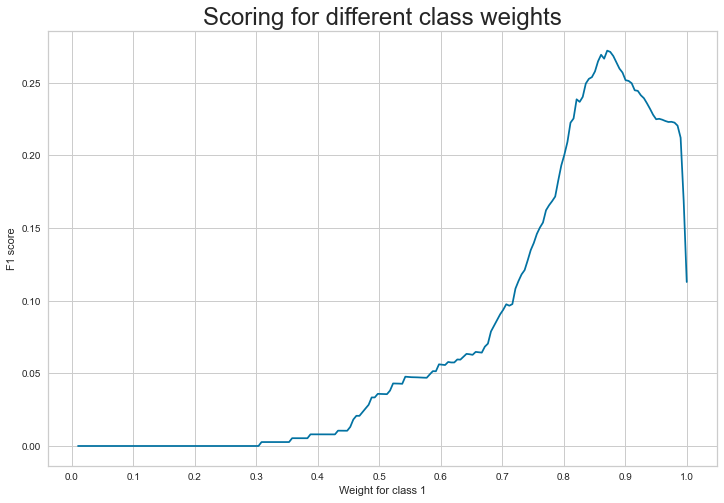

In [14]:
## https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/
#importing and training the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
lr = LogisticRegression(C=9.921,dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1122, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(5), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(lab_train,y_trw)
print(gridsearch.best_params_)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

The f1 score for the training data: 0.28461833525124663
The f1 score for the testing data: 0.21162444113263784
Train 
               precision    recall  f1-score   support

           0       0.96      0.87      0.92     11598
           1       0.20      0.50      0.28       738

    accuracy                           0.85     12336
   macro avg       0.58      0.69      0.60     12336
weighted avg       0.92      0.85      0.88     12336

Test 
               precision    recall  f1-score   support

           0       0.96      0.86      0.90      2899
           1       0.15      0.38      0.21       185

    accuracy                           0.83      3084
   macro avg       0.55      0.62      0.56      3084
weighted avg       0.91      0.83      0.86      3084



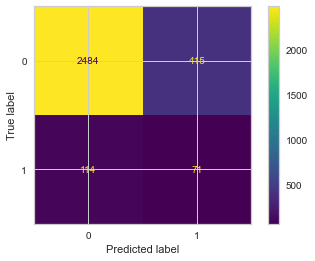

In [21]:
#importing and training the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
lr = LogisticRegression(C=9.921,dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1122, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False, class_weight={0: 0.13, 1: 0.87})
lr.fit(lab_train,y_trw)

# Predicting on the test data
pred_train = lr.predict(lab_train)
pred_test = lr.predict(lab_test)

#Calculating and printing the f1 score 
f1_train = f1_score(y_trw, pred_train)
f1_test = f1_score(y_tew, pred_test)
print('The f1 score for the training data:', f1_train)
print('The f1 score for the testing data:', f1_test)

#Ploting the confusion matrix
cm=confusion_matrix(y_tew,pred_test,labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_)
disp.plot()
print("Train \n",classification_report(y_trw,pred_train))
print("Test \n",classification_report(y_tew,pred_test))
plt.show()

In [23]:
import category_encoders as ce
CBE= ce.CatBoostEncoder(cols=cols)

In [24]:
CBE_train = CBE.fit_transform(X_trw, y_trw)
CBE_test=CBE.transform(X_tew)

In [25]:
CBE_traindf=pd.concat([lab_train,y_trw],axis='columns')
CBE_testdf=pd.concat([lab_test,y_tew],axis='columns')
CBE_traindf.head(5).T

,1010,14605,5450,3474,3842
Month,-0.196448,0.189110,0.248719,0.189110,0.009191
WeekOfMonth,0.004337,-0.077121,0.004337,0.004337,-0.047068
DayOfWeek,0.184856,0.086822,0.054290,0.086822,-0.102922
Make,0.070328,-0.047033,0.891358,-0.110091,-0.046424
AccidentArea,-0.051058,-0.051058,-0.051058,-0.051058,0.366069
DayOfWeekClaimed,-0.030445,0.068844,0.144858,0.068844,0.068844
MonthClaimed,-0.305107,-0.021520,0.339382,0.182242,0.290890
WeekOfMonthClaimed,0.079716,-0.042402,-0.069481,-0.003992,0.079716
Sex,-0.367150,0.056069,0.056069,0.056069,0.056069
MaritalStatus,0.008056,0.008056,0.008056,-0.021599,-0.021599


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   13.2s


{'class_weight': {0: 0.06964824120603015, 1: 0.9303517587939698}}


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   19.0s finished


Text(0.5, 1.0, 'Scoring for different class weights')

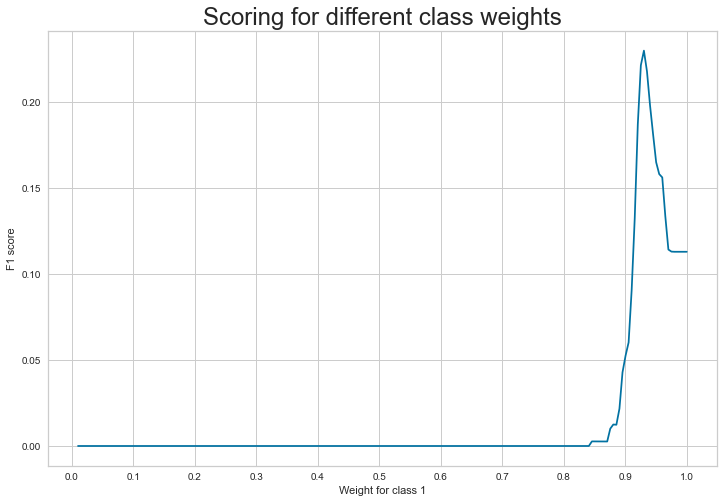

In [26]:
## https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/
#importing and training the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
lr = LogisticRegression()

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(CBE_train,y_trw)
print(gridsearch.best_params_)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

The f1 score for the training data: 0.22631390775831248
The f1 score for the testing data: 0.21450712957222567
Train
               precision    recall  f1-score   support

           0       0.99      0.64      0.77     11598
           1       0.13      0.86      0.23       738

    accuracy                           0.65     12336
   macro avg       0.56      0.75      0.50     12336
weighted avg       0.93      0.65      0.74     12336

Test
               precision    recall  f1-score   support

           0       0.99      0.57      0.72      2899
           1       0.12      0.94      0.21       185

    accuracy                           0.59      3084
   macro avg       0.56      0.75      0.47      3084
weighted avg       0.94      0.59      0.69      3084



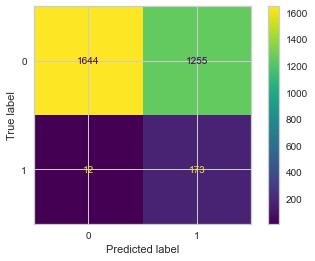

In [30]:
#importing and training the model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
lr = LogisticRegression(C=9.921,dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1122, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False, class_weight={0: 0.07, 1: 0.93})
lr.fit(CBE_train,y_trw)

# Predicting on the test data
pred_train = lr.predict(CBE_train)
pred_test = lr.predict(CBE_test)

#Calculating and printing the f1 score 
f1_train = f1_score(y_trw, pred_train)
f1_test = f1_score(y_tew, pred_test)
print('The f1 score for the training data:', f1_train)
print('The f1 score for the testing data:', f1_test)

#Ploting the confusion matrix
cm=confusion_matrix(y_tew,pred_test,labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_)
disp.plot()
print("Train\n",classification_report(y_trw,pred_train))
print("Test\n",classification_report(y_tew,pred_test))
plt.show()

In [ ]:
### Trying Label Encoder 
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
cols=['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'Deductible', 'DriverRating',
       'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
       'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled',
       'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
       'AddressChange_Claim', 'NumberOfCars', 'Year', 'BasePolicy',
       'age_bins']
vfl[cols]=vfl[cols].apply(LabelEncoder().fit_transform)
vfl.head()


In [ ]:
#Peform the train test split 
X_trla, X_tela, y_trla, y_tela = train_test_split(vfl.drop(columns='FraudFound_P'), 
                                                    vfl.FraudFound_P, test_size=0.2, 
                                                    random_state=47,stratify=vfl.FraudFound_P)

In [ ]:
label_traindf=pd.concat([X_trla,y_trla],axis='columns')
label_testdf=pd.concat([X_tela,y_tela],axis='columns')
label_traindf.head(5).T

In [ ]:
from imblearn.over_sampling import *
from imblearn.combine import SMOTETomek
SmoteTomek = SMOTETomek()

In [ ]:
from pycaret.classification import *
s = setup(label_traindf, target = 'FraudFound_P',data_split_stratify=True,
          fix_imbalance = True,fix_imbalance_method=SmoteTomek,train_size=0.8,fold_shuffle=True,fold=5,
            feature_selection=True,feature_selection_threshold=0.6,
            ignore_low_variance =True,remove_multicollinearity = True,combine_rare_levels=True,session_id=1122)

In [ ]:
setup_l = compare_models()

In [ ]:
setup=setup(CBE_traindf, target ='FraudFound_P',data_split_stratify=True,
          train_size=0.8, fold=5, session_id=1122)

In [ ]:
## Checking CatBoost Encoded Model again with logistic regression
CBE_lr = create_model('lr',fold=5)
tuned_cbe_lr=tune_model(CBE_lr,optimize='F1',custom_grid={'class_weight':{0: 0.07, 1: 0.93}},fold=5)
print(tuned_label_lr)